## NBA Statistics During Golden State Warriors (GSW) Championship Run Project - Exploratory Data Analysis

### Introduction:

In this section of the project, the basketball-reference data will be explored to see if there are any possible correlations to success (measured in wins) using the basic statistics of NBA teams. And in particular, I will be analyzing how the Golden State Warriors measure up in the relevant statistics as the team has had some of the most significant success over the past 5 seasons. 

Imported libraries are Pandas, Numpy, Matplotlib, and Seaborn; in addition, the copy and plotting module has been imported.

In [1]:
import pandas as pd # library for data manipulation and analysis
import numpy as np # library adding support for large arrays and matrices, including mathematical functions
import matplotlib.pyplot as plt # library for general plotting of data
import matplotlib.patches as mpatches # module to manipulate legend in graphs
import seaborn as sns # library for data visualization over matplotlib
%matplotlib inline
import copy # module for deep copy as needed
from pandas.plotting import table as tb # module for plotting table

Read in data and double check data for any issues

In [2]:
# read in csv files for analysis
# NOTE: if necessary, pass in index_col=0 to read_csv to utilize "Unnamed" column from csv as index column
gsw_df = pd.read_csv("gsw_df.csv")
all_teams_df = pd.read_csv("all_teams_df.csv")

In [3]:
# check head of gsw dataframe
gsw_df.head()

,Season,Tm,W,L,Finish,Age,FG,FGA,FG%,3P,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
0,2019,GSW,57,25,1,28.4,3612,7361,0.491,1087,...,1672,0.801,797,2990,3787,2413,625,525,1169,9650
1,2018,GSW,58,24,1,28.8,3509,6981,0.503,926,...,1668,0.815,691,2877,3568,2402,656,612,1267,9304
2,2017,GSW,67,15,1,28.2,3532,7140,0.495,982,...,1850,0.788,770,2873,3643,2491,785,555,1211,9503
3,2016,GSW,73,9,1,27.4,3489,7159,0.487,1077,...,1790,0.763,816,2972,3788,2373,689,498,1245,9421
4,2015,GSW,67,15,1,26.6,3410,7137,0.478,883,...,1709,0.768,853,2814,3667,2248,762,496,1185,9016


In [4]:
# check head of all teams dataframe
all_teams_df.head()

,Season,Tm,W,L,Finish,Age,FG,FGA,FG%,3P,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
0,2019,ATL,29,53,5,25.1,3392,7524,0.451,1067,...,1918,0.752,955,2825,3780,2118,675,419,1397,9294
1,2018,ATL,24,58,5,25.4,3130,7015,0.446,917,...,1654,0.785,743,2693,3436,1946,638,348,1276,8475
2,2017,ATL,43,39,2,27.9,3123,6918,0.451,729,...,2039,0.728,842,2793,3635,1938,672,397,1294,8459
3,2016,ATL,48,34,2,28.2,3168,6923,0.458,815,...,1638,0.783,679,2772,3451,2100,747,486,1226,8433
4,2015,ATL,60,22,1,27.8,3121,6699,0.466,818,...,1735,0.778,715,2611,3326,2111,744,380,1167,8409


**Additional statistics to add to data frame**

There are a variety of metrics measured in the NBA, however, for the purposes of this project I will be using basic team statistics and will add two additional statistics, Assist-to-Turnover ratio (AstTOVr) and True Shooting Percentage (TS%). These additional statistics have been included due the Golden State Warriors' success and implementation of an offensive system beginning in the 2014-15 NBA season, the first season of their historic run. Indicated below is how these metrics are calculated.

**Assist-to-Turnover Ratio (AstTOVr):**
- **Formula:** Assists / Turnovers
- **Description:** This ratio is considered to measure ball control; where assists are ball possession opportunities resulting in field goal scores from a player passing the ball to the teammate that scores and turnovers are lost ball possession opportunities.

**True Shooting Percentage (TS%):**
- **Formula:** Points / (2 * TSA)
- **Description:** Per basketball-reference glossary, true shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.

**True Shooting Attempts (TSA) - to calculate true shooting percentage (TS%):**
- **Formula:** Field Goal Attempts + (0.44 * Free Throw Attempts)

In [5]:
# formulae for Assist-to-Turnover ratio & True Shooting %

# create new variable: Assist-to-Turnover ratio
all_teams_AstTOVr = all_teams_df['AST']/all_teams_df['TOV']
gsw_AstTOVr = gsw_df['AST']/gsw_df['TOV']

# calculate True Shooting Attempts (TSA) - formula: FGA + (0.44 * FTA)
all_teams_TSA = all_teams_df['FGA'] + (0.44*all_teams_df['FTA'])
gsw_TSA = gsw_df['FGA'] + (0.44*gsw_df['FTA'])

# create new variable: True Shooting % - formula: PTS / (2*TSA)
all_teams_TSP = all_teams_df['PTS'] / (2*all_teams_TSA)
gsw_TSP = gsw_df['PTS'] / (2*gsw_TSA)

In [6]:
# add new variables to dataframes

# AstTOVr
all_teams_df['AstTOVr'] = all_teams_AstTOVr
gsw_df['AstTOVr'] = gsw_AstTOVr

# TS%
all_teams_df['TS%'] = all_teams_TSP
gsw_df['TS%'] = gsw_TSP

In [7]:
# recheck dataframe columns to view new columns have been added
print(all_teams_df.columns)
print(gsw_df.columns)

Index(['Season', 'Tm', 'W', 'L', 'Finish', 'Age', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'AstTOVr', 'TS%'],
      dtype='object')
Index(['Season', 'Tm', 'W', 'L', 'Finish', 'Age', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'AstTOVr', 'TS%'],
      dtype='object')


**Check correlations and possible issues with collinearity**
<br>For this project, we will be checking for which statistics have positive correlations to Wins (W)</br>

In [8]:
# to view table of correlations for all_teams
all_teams_df.iloc[:, 1:].corr()

,W,L,Finish,Age,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,AstTOVr,TS%
W,1.000000,-1.000000,-0.825537,0.505797,0.430211,0.003772,0.637234,0.354905,0.239725,0.586679,...,-0.073674,0.398874,0.295972,0.410299,0.196374,0.347543,-0.247484,0.478859,0.491826,0.675436
L,-1.000000,1.000000,0.825537,-0.505797,-0.430211,-0.003772,-0.637234,-0.354905,-0.239725,-0.586679,...,0.073674,-0.398874,-0.295972,-0.410299,-0.196374,-0.347543,0.247484,-0.478859,-0.491826,-0.675436
Finish,-0.825537,0.825537,1.000000,-0.463435,-0.292386,0.074747,-0.509029,-0.303828,-0.209821,-0.479392,...,0.129120,-0.314872,-0.192728,-0.261885,-0.110021,-0.278446,0.154564,-0.350936,-0.310978,-0.564883
Age,0.505797,-0.505797,-0.463435,1.000000,0.054717,-0.222172,0.299071,0.111043,0.043486,0.310335,...,-0.300531,0.072072,-0.112119,0.133536,0.002690,0.059977,-0.344975,0.111401,0.337986,0.336101
FG,0.430211,-0.430211,-0.292386,0.054717,1.000000,0.744482,0.749597,0.491523,0.426091,0.436824,...,-0.043503,0.605104,0.488355,0.736460,0.140864,0.231498,-0.044722,0.891802,0.625700,0.705335
FGA,0.003772,-0.003772,0.074747,-0.222172,0.744482,1.000000,0.116712,0.485058,0.520295,0.011197,...,0.237850,0.562714,0.614602,0.441169,-0.009532,-0.000004,-0.061767,0.686187,0.406169,0.200299
FG%,0.637234,-0.637234,-0.509029,0.299071,0.749597,0.116712,1.000000,0.251509,0.119717,0.638129,...,-0.301310,0.341829,0.116324,0.656210,0.221424,0.341028,-0.006999,0.646934,0.527395,0.851323
3P,0.354905,-0.354905,-0.303828,0.111043,0.491523,0.485058,0.251509,1.000000,0.976647,0.409334,...,-0.240868,0.481954,0.270069,0.449660,0.046128,0.072206,-0.023264,0.726130,0.386595,0.657654
3PA,0.239725,-0.239725,-0.209821,0.043486,0.426091,0.520295,0.119717,0.976647,1.000000,0.206818,...,-0.177598,0.451854,0.281008,0.374972,0.044836,0.034720,0.015470,0.677716,0.301900,0.545192
3P%,0.586679,-0.586679,-0.479392,0.310335,0.436824,0.011197,0.638129,0.409334,0.206818,1.000000,...,-0.348600,0.279789,0.036417,0.451791,0.025426,0.181918,-0.168462,0.431006,0.475151,0.676981


In [9]:
# determine which statistics have a positive correlation to wins (above 0.3); append relevant predictor variables to list
pred_var1 = []
init_stat_list = []

for i in all_teams_df.columns[2:]:
    if all_teams_df[i] is not all_teams_df['W']:
        if all_teams_df[i].corr(all_teams_df['W']) > .3:
            pred_var1.append(i)  
            init_stat_list.append(i + ' | ' + str(round(all_teams_df[i].corr(all_teams_df['W']), 5)))

In [10]:
# export initial_stat_list to txt file
with open('initial_list.txt', 'w') as f:
    print(init_stat_list, file=f)

In [11]:
# view correlation table of predictor variables with positive correlation to wins to check for possible collinearity issues
# list of predictor variables ['Age', 'FG', 'FG%', '3P', '3P%', '2P%', 'DRB', 'AST', 'BLK', 'PTS', 'AstTOVr', 'TS%']
all_teams_df[pred_var1].corr()

,Age,FG,FG%,3P,3P%,2P%,DRB,AST,BLK,PTS,AstTOVr,TS%
Age,1.000000,0.054717,0.299071,0.111043,0.310335,0.256119,0.072072,0.133536,0.059977,0.111401,0.337986,0.336101
FG,0.054717,1.000000,0.749597,0.491523,0.436824,0.762395,0.605104,0.736460,0.231498,0.891802,0.625700,0.705335
FG%,0.299071,0.749597,1.000000,0.251509,0.638129,0.807537,0.341829,0.656210,0.341028,0.646934,0.527395,0.851323
3P,0.111043,0.491523,0.251509,1.000000,0.409334,0.665365,0.481954,0.449660,0.072206,0.726130,0.386595,0.657654
3P%,0.310335,0.436824,0.638129,0.409334,1.000000,0.405217,0.279789,0.451791,0.181918,0.431006,0.475151,0.676981
2P%,0.256119,0.762395,0.807537,0.665365,0.405217,1.000000,0.456249,0.664980,0.292677,0.833461,0.494371,0.912917
DRB,0.072072,0.605104,0.341829,0.481954,0.279789,0.456249,1.000000,0.457020,0.322488,0.626852,0.382916,0.438827
AST,0.133536,0.736460,0.656210,0.449660,0.451791,0.664980,0.457020,1.000000,0.335116,0.657410,0.728183,0.636266
BLK,0.059977,0.231498,0.341028,0.072206,0.181918,0.292677,0.322488,0.335116,1.000000,0.193248,0.164722,0.277594
PTS,0.111401,0.891802,0.646934,0.726130,0.431006,0.833461,0.626852,0.657410,0.193248,1.000000,0.542501,0.824397


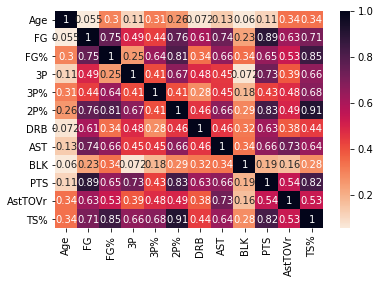

In [12]:
# heatmap visualization of correlations for initial predictor variables 
# list of predictor variables ['Age', 'FG', 'FG%', '3P', '3P%', '2P%', 'DRB', 'AST', 'BLK', 'PTS', 'AstTOVr', 'TS%']
sns.heatmap(all_teams_df[pred_var1].corr(), annot=True, cmap = 'rocket_r')
plt.show()

In [13]:
# create a list of predictor variable names to check for collinearity issues; check for collinearity where correlation is > 0.75
# list of predictor variables ['Age', 'FG', 'FG%', '3P', '3P%', '2P%', 'DRB', 'AST', 'BLK', 'PTS', 'AstTOVr', 'TS%']
check_list = copy.deepcopy(pred_var1)
init_stat_corr = []

for i in check_list:
    for e in check_list[::-1]:
        if all_teams_df[i] is not all_teams_df[e]:
            if all_teams_df[i] is all_teams_df['TS%']:
                break
            elif all_teams_df[i].corr(all_teams_df[e]) > 0.75:
                print(i + ' corr ' + e + ' | ' + str(round(all_teams_df[i].corr(all_teams_df[e]), 5)))
                init_stat_corr.append(i + ' corr ' + e + ' | ' + str(round(all_teams_df[i].corr(all_teams_df[e]), 5)))
        elif all_teams_df[i] is all_teams_df['PTS'] and all_teams_df[e] is all_teams_df['PTS']:
                break

FG corr PTS | 0.8918
FG corr 2P% | 0.76239
FG% corr TS% | 0.85132
FG% corr 2P% | 0.80754
2P% corr TS% | 0.91292
2P% corr PTS | 0.83346
2P% corr FG% | 0.80754
2P% corr FG | 0.76239
PTS corr TS% | 0.8244


In [14]:
# export initial_stat_correlations to txt file
with open('initial_corr.txt', 'w') as f:
    print(init_stat_corr, file=f)

Based on above information, these metrics (i.e. 2P%, FG, FG%, PTS, TS%) have high collinearity issues. For purposes of this project, I will keep TS% as it is noted to be a measurement of shooting efficiency, and will remove the remaining metric variables 2P%, FG, FG%, PTS.

In [15]:
# list of predictor variables ['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']
pred_var2 = ['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']
all_teams_df[pred_var2].corr()

,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
Age,1.000000,0.111043,0.310335,0.072072,0.133536,0.059977,0.337986,0.336101
3P,0.111043,1.000000,0.409334,0.481954,0.449660,0.072206,0.386595,0.657654
3P%,0.310335,0.409334,1.000000,0.279789,0.451791,0.181918,0.475151,0.676981
DRB,0.072072,0.481954,0.279789,1.000000,0.457020,0.322488,0.382916,0.438827
AST,0.133536,0.449660,0.451791,0.457020,1.000000,0.335116,0.728183,0.636266
BLK,0.059977,0.072206,0.181918,0.322488,0.335116,1.000000,0.164722,0.277594
AstTOVr,0.337986,0.386595,0.475151,0.382916,0.728183,0.164722,1.000000,0.533207
TS%,0.336101,0.657654,0.676981,0.438827,0.636266,0.277594,0.533207,1.000000


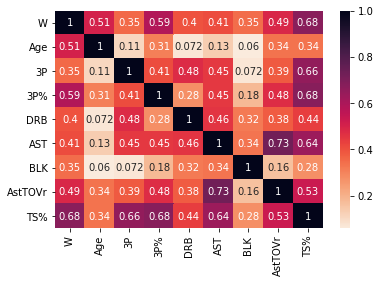

In [16]:
# heatmap visualization of correlations for predictor variables after adjusting for variables with possible collinearity issues
# list of predictor variables ['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%'] vs Wins
sns.heatmap(all_teams_df[['W','Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].corr(), annot=True, cmap = 'rocket_r')
plt.show()
# plt.savefig('pred_var_heatmap.png')

Take a quick look at GSW age over the past 5 seasons

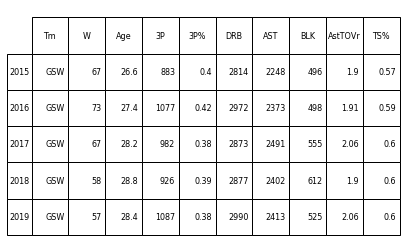

In [17]:
# create table to see GSW Age over the years along with their W/L record
gsw_age_vals = gsw_df[['Season','Tm','W','Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].sort_values(by='Season').copy(deep=True)
gsw_age_vals.set_index(gsw_age_vals['Season'].values, inplace=True)
gsw_age_vals.drop('Season', axis=1, inplace=True)

axt1 = plt.subplot(frame_on=False)
axt1.xaxis.set_visible(False)
axt1.yaxis.set_visible(False)
gsw_tb = tb(axt1, gsw_age_vals.round(2), loc='center', bbox=[0,-.05,1.1,1])
gsw_tb.auto_set_font_size(False)
gsw_tb.set_fontsize(8)

# plt.savefig('gsw_age_vals.png')

In [18]:
# convert to csv & save all_teams_df data frame with updated stats for model prediction
# NOTE: do not need to convert/save gsw_df as GSW team is already included in all_teams_df

# pass in index=False to ensure index level is not saved to csv file
all_teams_df[['Season','Tm','W','Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].to_csv("all_teams_df_stats.csv", index=False)

**Creates graphs of each statistic for all teams throughout the 5 seasons (i.e. 2014-15 to 2018-19)**
- Each metric (Age, 3P, 3P%, DRB, AST, BLK, AstTOVr, TS%) in relation to wins
- Label GSW with each season to view team's performance in metric

Establish details to add to graphs; e.g. color of points, labels, and legend.

In [19]:
# Initialize list variables to color code points for GSW vs rest of the NBA teams.
# Create labels for each year to place on GSW points.

# color markers based on team
col_all_seas = []
for team in all_teams_df['Tm']:
    if team == 'GSW':
        col_all_seas.append('yellow')
    else:
        col_all_seas.append('#1f77b4')

# create ndarray variable for GSW season values
seasons_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['Season'].values

# create list of labels for each year of GSW point
seasons_labels = []
for year in seasons_gsw:
    if year == 2019:
        seasons_labels.append("'19")
    elif year == 2018:
        seasons_labels.append("'18")
    elif year == 2017:
        seasons_labels.append("'17")
    elif year == 2016:
        seasons_labels.append("'16")
    else:
        seasons_labels.append("'15")
        
# create legend
all_leg_gsw = mpatches.Patch(color='yellow', label='GSW')
all_leg_teams = mpatches.Patch(color='#1f77b4', label='Rest of NBA')

Establish functions to streamline creation of graphs to be made for each statistic.

In [20]:
def get_alltms_leg(gsw, other_teams):
    """
    Create a graph legend identifying the Golden State Warriors (GSW) and the rest of the NBA teams.
    
    Takes a variable identifying the label color for GSW and rest of the NBA.
    """
    # add legend
    plt.legend(loc='lower right', handles=[gsw, other_teams])

In [21]:
# function to create label in graph
def get_gsw_lbls(df, stat, gsw_lbls):
    """
    Create graph labels identifying the Golden State Warriors (GSW) data points, x & y labels, and graph title.
    
    Takes a dataframe, string of the statistic, and the data point labels for GSW.
    """
    # create new variables as ndarrays
    x_gsw = df[df['Tm']=='GSW'][stat].values
    y_gsw = df[df['Tm']=='GSW']['W'].values

    # create labels
    for label,x_stat,y_stat in zip(gsw_lbls, x_gsw, y_gsw):
        plt.annotate(s=label, xy=(x_stat, y_stat), xytext=(-20,2), textcoords='offset points')

    plt.xlabel(stat)
    plt.ylabel('Wins')
    plt.title(stat + ' vs Wins (2014-15 to 2018-19 Seasons)')

In [22]:
# function to create graph of all teams throughout 5 seasons
def get_alltms_graph(df, stat, tm_clrs, lbls, gsw, others):
    """
    Create a graph for statistic vs wins for all team data points from a dataframe.
    
    Takes a dataframe, string of the statistic, list of colors for data points,
    list of labels for data points, legend label for GSW, and legend label for other teams.
    """
    # take a closer look at stat vs wins for all seasons (i.e. 2014-2015 to 2018-2019)
    plt.scatter(x=df[stat].values, y=df['W'].values, c=tm_clrs) # scatter plot

    # add labels
    get_gsw_lbls(df, stat, lbls)

    # add legend
    get_alltms_leg(gsw, others)

    plt.show() # comment or remove this line to save figure properly
#     plt.savefig(stat + '_vs_wins.png',bboxinches='tight')

Create graphs for each stat &mdash; Age, 3P, 3P%, DRB, AST, BLK, AstTOVr, TS% &mdash; in relation to Wins.

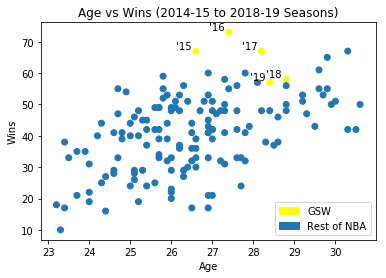

In [23]:
# call get_alltms_graph() function for Age graph
get_alltms_graph(all_teams_df, 'Age', col_all_seas, seasons_labels, all_leg_gsw, all_leg_teams)

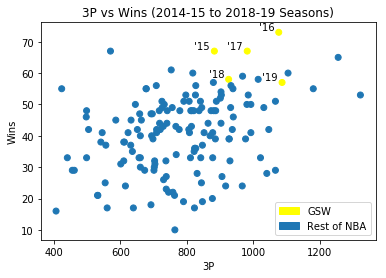

In [24]:
# call get_alltms_graph() function for 3P graph
get_alltms_graph(all_teams_df, '3P', col_all_seas, seasons_labels, all_leg_gsw, all_leg_teams)

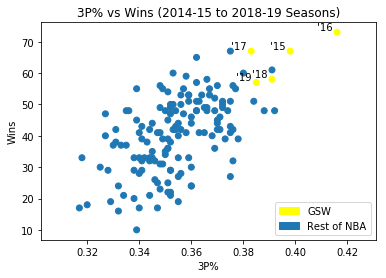

In [25]:
# call get_alltms_graph() function for 3P% graph
get_alltms_graph(all_teams_df, '3P%', col_all_seas, seasons_labels, all_leg_gsw, all_leg_teams)

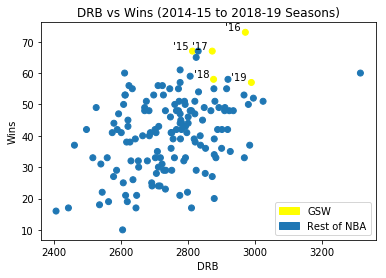

In [26]:
# call get_alltms_graph() function for DRB graph
get_alltms_graph(all_teams_df, 'DRB', col_all_seas, seasons_labels, all_leg_gsw, all_leg_teams)

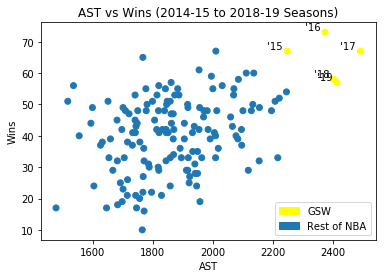

In [27]:
# call get_alltms_graph() function for AST graph
get_alltms_graph(all_teams_df, 'AST', col_all_seas, seasons_labels, all_leg_gsw, all_leg_teams)

Use code below to manually recoordinate location of ('19) data point label.

In [28]:
# # take a closer look at AST vs wins for all seasons (i.e. 2014-2015 to 2018-2019)

# plt.scatter(x=all_teams_df['AST'].values, y=all_teams_df['W'].values, c=col_all_seas) # scatter plot

# # create new variables as ndarrays
# xast_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['AST'].values
# yast_gsw = all_teams_df[all_teams_df['Tm']=='GSW']['W'].values

# # create labels
# for label_ast,xast,yast in zip(seasons_labels, xast_gsw, yast_gsw):
#     if label_ast == "'19":
#         plt.annotate(s=label_ast, xy=(xast, yast), xytext=(5,5), textcoords='offset points')
#     else:
#         plt.annotate(s=label_ast, xy=(xast, yast), xytext=(-20,2), textcoords='offset points')
    
# plt.xlabel('AST')
# plt.ylabel('Wins')
# plt.title('AST vs Wins (2014-15 to 2018-19 Seasons)')

# # add legend
# plt.legend(loc='lower right', handles=[all_leg_gsw, all_leg_teams])

# # plt.show()
# plt.savefig('ast_vs_wins.png',bboxinches='tight')

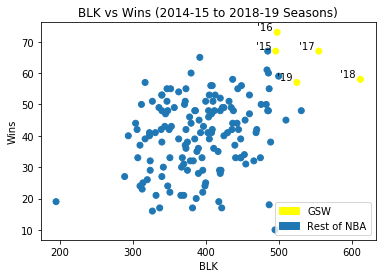

In [29]:
# call get_alltms_graph() function for BLK graph
get_alltms_graph(all_teams_df, 'BLK', col_all_seas, seasons_labels, all_leg_gsw, all_leg_teams)

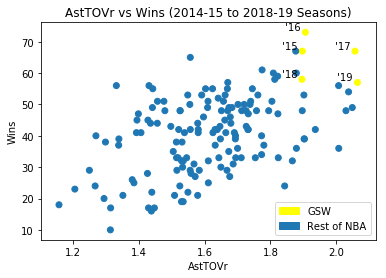

In [30]:
# call get_alltms_graph() function for AstTOVr graph
get_alltms_graph(all_teams_df, 'AstTOVr', col_all_seas, seasons_labels, all_leg_gsw, all_leg_teams)

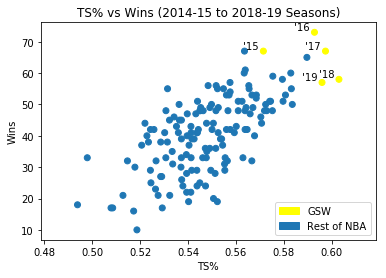

In [31]:
# call get_alltms_graph() function for TS% graph
get_alltms_graph(all_teams_df, 'TS%', col_all_seas, seasons_labels, all_leg_gsw, all_leg_teams)

**Create new data frames with pertinent predictor variables**
- one data frame for total averages of each season with given predictor variables
- set of data frames for all_teams using predictor variables **(NOTE: broken down per season)**

In [32]:
# create new data frame with the averages of predictor variables grouped by season
# list of predictor variables ['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%'] + 'W' to create table
WINS_mean_tb = all_teams_df.groupby(by=['Season']).mean()[['W', 'Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].copy(deep=True)

# list of predictor variables ['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']
WINS_mean = all_teams_df.groupby(by=['Season']).mean()[pred_var2].copy(deep=True)

# view new data frame
WINS_mean

,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
Season,,,,,,,,
2015,26.746667,643.333333,0.349100,2657.433333,1806.733333,393.233333,1.547869,0.534194
2016,26.636667,698.433333,0.352767,2734.033333,1827.733333,406.433333,1.556807,0.541245
2017,26.586667,791.600000,0.357167,2736.966667,1855.333333,388.966667,1.631606,0.552415
2018,26.446667,860.233333,0.361733,2772.033333,1905.433333,394.866667,1.632766,0.556167
2019,26.276667,931.833333,0.355500,2855.100000,2016.100000,406.166667,1.752857,0.559579


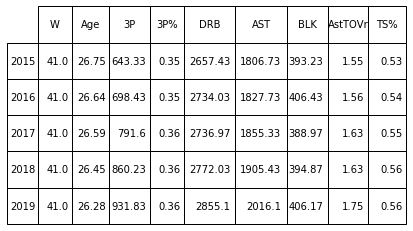

In [33]:
# create table of each season's stats averages; include wins
axmean = plt.subplot(frame_on=False)
axmean.xaxis.set_visible(False)
axmean.yaxis.set_visible(False)
tbmean = tb(axmean, WINS_mean_tb.round(2), loc='center', bbox=[0,0,1.1,1], colWidths=[0.1,0.11, 0.12, 0.1, 0.15, 0.15, 0.12, 0.12, 0.11, 0.11])
tbmean.auto_set_font_size(False)
tbmean.set_fontsize(10)

# plt.savefig('season_mean_vals.png')

**Quick year-over-year analysis of data for each stat**

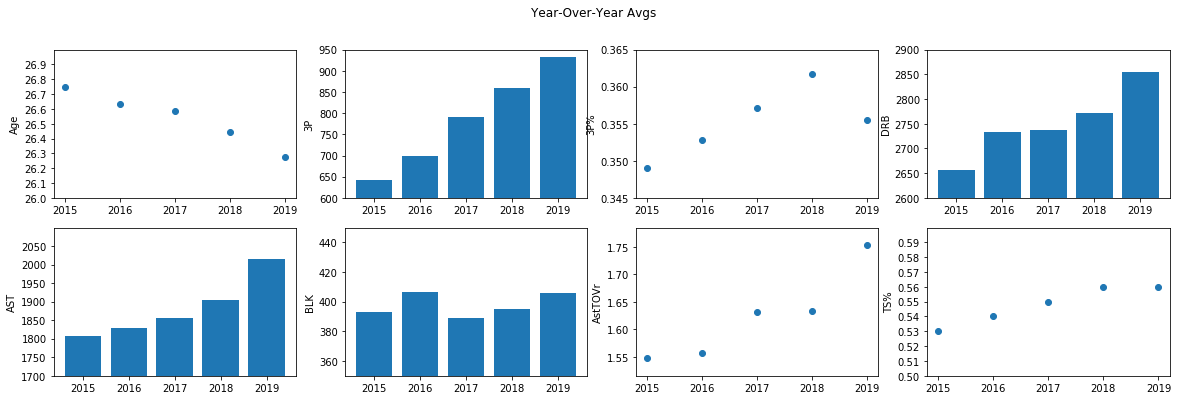

In [34]:
# create graphs to visualize year-over-year change in mean stats for each variable
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2,ncols=4,figsize=(20,6))
WINS_x_labels = ['2015','2016','2017','2018','2019']

ax1.scatter(x=WINS_x_labels, y='Age', data=WINS_mean)
ax1.set(ylabel='Age')
ax1.set_ylim([26,27])
ax1.set_yticks(np.arange(26,27,.1))

ax2.bar(x=WINS_x_labels, height='3P', data=WINS_mean)
ax2.set(ylabel='3P')
ax2.set_ylim([600,950])

ax3.scatter(x=WINS_x_labels, y='3P%', data=WINS_mean)
ax3.set(ylabel='3P%')
ax3.set_ylim([0.345,0.365])
ax3.set_yticks(np.arange(0.345,0.365,0.005))

ax4.bar(x=WINS_x_labels, height='DRB', data=WINS_mean)
ax4.set(ylabel='DRB')
ax4.set_ylim([2600,2900])

ax5.bar(x=WINS_x_labels, height='AST', data=WINS_mean)
ax5.set(ylabel='AST')
ax5.set_ylim([1700,2100])
ax5.set_yticks(np.arange(1700,2100,50))

ax6.bar(x=WINS_x_labels, height='BLK', data=WINS_mean)
ax6.set(ylabel='BLK')
ax6.set_ylim([350,450])

ax7.scatter(x=WINS_x_labels, y='AstTOVr', data=WINS_mean)
ax7.set(ylabel='AstTOVr')

ax8.scatter(x=WINS_x_labels, y='TS%', data=round(WINS_mean,2))
ax8.set(ylabel='TS%')
ax8.set_ylim([0.5,0.6])
ax8.set_yticks(np.arange(0.5,0.6,0.01))

plt.suptitle(t='Year-Over-Year Avgs')

plt.show()
# plt.savefig('yoy_mean.png',bbox_inches='tight')

**Explore data for each year**
<br>Predictor variables: Age, 3P, 3P%, DRB, AST, BLK, AstTOVr, TS%</br>
- Find max values for each predictor variable (first for all 5 seasons combined, then each individual season); see whether the Golden State Warriors (GSW) or another team are at the top
- For each year, view which teams are greater than the mean statistic for the predictor variable in that year and that also have wins (W) equal or greater than the 9th team in the division (Eastern / Western Conferences)
- If GSW was not the top value for a predictor variable, create a graph to visualize where GSW placed amongst the top 5 teams for that predictor variable (including the Wins of the top 5 teams) as well as the AVG for the predictor variable and Wins (W).

In [35]:
# find the index of the max value for all seasons (i.e. 2014-2015 to 2018-2019)
idx_max_val_all_seasons = all_teams_df[['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].idxmax()
print(idx_max_val_all_seasons)

Age        26
3P         50
3P%        48
DRB        80
AST        47
BLK        46
AstTOVr    45
TS%        46
dtype: int64


In [36]:
# view the rows of indexes with max value
max_val_all_seasons = all_teams_df[['Season','Tm','Age','W','L','3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].loc[[26,50,48,80,47,46,45]]
print(max_val_all_seasons)

    Season   Tm   Age   W   L    3P    3P%   DRB   AST  BLK   AstTOVr  \
26    2018  CLE  30.6  50  32   981  0.372  2761  1916  312  1.701599   
50    2019  HOU  29.2  53  29  1323  0.356  2613  1741  405  1.591408   
48    2016  GSW  27.4  73   9  1077  0.416  2972  2373  498  1.906024   
80    2019  MIL  26.9  60  22  1105  0.353  3316  2136  486  1.878628   
47    2017  GSW  28.2  67  15   982  0.383  2873  2491  555  2.056978   
46    2018  GSW  28.8  58  24   926  0.391  2877  2402  612  1.895817   
45    2019  GSW  28.4  57  25  1087  0.385  2990  2413  525  2.064157   

         TS%  
26  0.583507  
50  0.580660  
48  0.592769  
80  0.582879  
47  0.597372  
46  0.602987  
45  0.595923  


In [37]:
# round statistic values to fit in table cells; concat Pandas series together
max_val_seasons = pd.concat([max_val_all_seasons[['Season','Tm']], max_val_all_seasons[['W','Age','3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].round(3)], axis=1).copy(deep=True)

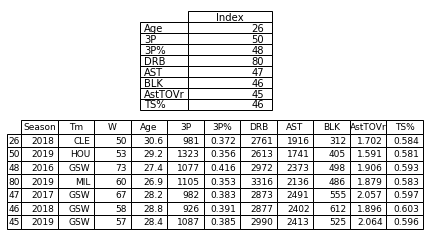

In [38]:
# create tables to show print out of idxmax() and loc[idxmax] for each statistic

# table for idxmax()
axMaxIdx = plt.subplot(211,frame_on=False)
axMaxIdx.xaxis.set_visible(False)
axMaxIdx.yaxis.set_visible(False)
tbMaxIdx = tb(axMaxIdx, idx_max_val_all_seasons, loc='center', bbox=[.4,-.05,.25,1], colLabels=['Index'], colWidths=[0.2,0.05])

# table for loc[idxmax]
axMaxVals = plt.subplot(212,frame_on=False)
axMaxVals.xaxis.set_visible(False)
axMaxVals.yaxis.set_visible(False)
tbMaxVals = tb(axMaxVals, max_val_seasons, loc='center', bbox=[-.1,-.05,1.2,1.1])
tbMaxVals.auto_set_font_size(False)
tbMaxVals.set_fontsize(9)

# plt.savefig('max_stat_vals.png')

**Per season analysis below**
- sorted by season, stats where GSW was not ranked 1st, western/eastern conference vs league average

For convenience in analyzing each year individually, separate each year into its own dataframe.

In [39]:
# create data frame for each specific season for all_teams to break down into predictor variables
season_2015 = all_teams_df[all_teams_df['Season']==2015].copy(deep=True)
season_2016 = all_teams_df[all_teams_df['Season']==2016].copy(deep=True)
season_2017 = all_teams_df[all_teams_df['Season']==2017].copy(deep=True)
season_2018 = all_teams_df[all_teams_df['Season']==2018].copy(deep=True)
season_2019 = all_teams_df[all_teams_df['Season']==2019].copy(deep=True)

# create data frame from each season for all_teams broken down by predictor variables
# list of predictor variables ['Season', 'Tm', 'W', 'Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']
pred_var_teams = ['Season', 'Tm', 'W', 'Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']

WINS_teams_2015 = season_2015[pred_var_teams].copy(deep=True)
WINS_teams_2016 = season_2016[pred_var_teams].copy(deep=True)
WINS_teams_2017 = season_2017[pred_var_teams].copy(deep=True)
WINS_teams_2018 = season_2018[pred_var_teams].copy(deep=True)
WINS_teams_2019 = season_2019[pred_var_teams].copy(deep=True)

In [40]:
# create lists for western and eastern conferences 
west_conf = ['DAL','DEN','GSW','HOU','LAC','LAL','MEM','MIN','NOP','OKC','PHO','POR','SAC','SAS','UTA']
east_conf = ['ATL','BOS','BRK','CHO','CHI','CLE', 'DET','IND','MIA','MIL','NYK','ORL','PHI','TOR','WAS']

**Below are two sets of functions to analyze each season**

Print a list of all stats &mdash; Age, 3P, 3P%, DRB, AST, BLK, AstTOVr, TS% &mdash; listing the playoff teams from each conference that had a value higher than the season average in the specific stat; highlight GSW in red if in list

In [41]:
def get_conf_tmw(df, west_con, east_con):
    """
    Separate teams into each conference for a particular Season; 
    returns west and east team list, including wins, for that Season.
    
    Takes a dataframe and a list of west and east conference teams.
    """
    # create new lists for each conference; appending the Wins for each team in the given year
    west = []
    east = []

    for i in west_con:
        for e, team in enumerate(df['Tm']):
            if i == team:
                west.append([df['Tm'].iloc[e], df['W'].iloc[e]])

    for i in east_con:
        for e, team in enumerate(df['Tm']):
            if i == team:
                east.append([df['Tm'].iloc[e], df['W'].iloc[e]])
                
    return west, east

In [42]:
def sort_conf(west_con, east_con):
    """
    Sort and return a list west and east conferences by win record in descending order.
    
    Takes a list of west and east conference teams.
    """
    # sort list so that Wins are descending from greatest to lowest
    west_sorted = []
    east_sorted = []

    west_sorted = sorted(west_con, key=lambda x:x[1], reverse=True)
    east_sorted = sorted(east_con, key=lambda x:x[1], reverse=True)

    return west_sorted, east_sorted

In [43]:
def show_top_tms(mean_df, yr_df, west_sort, east_sort):
    """
    Print a list of the top teams from each conference that have a greater statiscal value than the average for that season in each respective stat;
    GSW is highlighted in red if the team is in the list.
    
    Takes a dataframe with average stat values, dataframe for a specific season, sorted west and east list of teams.
    """
    # view teams that are greater than the mean statistic for each predictor variable and have equal or greater Wins than the 9th placed team in their respective conference
    # include team name ('Tm'), division ('Div'), wins ('Wins'), predictor variable ('Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%')
    for f, col in enumerate(mean_df.columns): # loop through columns to run through each predictor variable
        print('\033[1m\033[4m' + '\n' + str(yr_df['Season'].iloc[0]) + ' season: ' +  str(col) + ' stats')
        for g in range(len(yr_df)): # loop through total number of teams
            if mean_df.iloc[0][f] < yr_df.iloc[g][f+3]: # check if statistic for team is greater than the average for the season
                for e, team in enumerate(west_sort): # check western conference teams; only list teams with more Wins than 9th team in respective conference
                    if yr_df.iloc[g][1] == team[0]:
                        if yr_df.iloc[g][2] >= west_sort[7][1]:
                            if yr_df.iloc[g][1] == 'GSW':
                                h = yr_df.index[g]
                                print('\033[1m\033[91m' + 'Tm: ' + yr_df['Tm'].loc[h] + '    Div: West    Wins: ' + str(yr_df.iloc[g][2]) 
                                      + '    ' + col + ' ' + str(round(yr_df.iloc[g][f+3], 5)))
                            else:
                                i = yr_df.index[g]
                                print('\033[0m' + 'Tm: ' + yr_df['Tm'].loc[i] + '    Div: West    Wins: ' + str(yr_df.iloc[g][2]) 
                                      + '    ' + col + ' ' + str(round(yr_df.iloc[g][f+3], 5)))  

                for e2, team2 in enumerate(east_sort): # check eastern conference teams; only list teams with more Wins than 9th team in respective conference
                    if yr_df.iloc[g][1] == team2[0]:
                        if yr_df.iloc[g][2] >= east_sort[7][1]:
                            i = yr_df.index[g]
                            print('\033[0m' + 'Tm: ' + yr_df['Tm'].loc[i] + '    Div: East    Wins: ' + str(yr_df.iloc[g][2])
                                    + '    ' + col + ' ' + str(round(yr_df.iloc[g][f+3], 5)))

Create graphs for each stat where GSW did not have the best value for that stat and list the the top 5 teams; if they're not in the top 5 list, show their data point; include the season average data point for each stat. 

**NOTE:** Age has it's own function for extracting relevant data points and showing graph due to inclusion of youngest *and* oldest 5 teams.

In [44]:
def get_age_info(df):
    """
    Create ndarrays of team, stat, wins - this function is specifically for age.
    Returns an array for teams, x-coordinate stat, y-coordinate wins.
    
    Takes a dataframe.
    """
    # create ndarray variables holding teams, variable stats, and wins
    # extract youngest 5 teams
    teams_age = df[['Tm','Age','W']].sort_values(by='Age').head().values[:,0] # team
    teams_agex = df[['Tm','Age','W']].sort_values(by='Age').head().values[:,1] # age
    teams_agey = df[['Tm','Age','W']].sort_values(by='Age').head().values[:,2] # wins

    # extract oldest 5 teams
    max_age = df[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,0] # team
    max_agex = df[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,1] # age
    max_agey = df[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,2] # wins

    # concatenate ndarray variables holding data 
    teams_age = np.concatenate((teams_age, max_age), axis=None)
    teams_agex = np.concatenate((teams_agex, max_agex), axis=None)
    teams_agey = np.concatenate((teams_agey, max_agey), axis=None)
    
    # check if GSW is in the youngest and oldest 5 teams; concatenate GSW info if NOT in either list
    if 'GSW' not in df[['Tm','Age','W']].sort_values(by='Age').head().values[:,0]\
    and 'GSW' not in df[['Tm','Age','W']].sort_values(by='Age', ascending=False).head().values[:,0]:
        idx = df.loc[df['Tm']=='GSW'].index[0] # extract GSW index to search using .loc
        teams_age = np.concatenate((teams_age, df.loc[idx]['Tm']), axis=None)
        teams_agex = np.concatenate((teams_agex, df.loc[idx]['Age']), axis=None)
        teams_agey = np.concatenate((teams_agey, df.loc[idx]['W']), axis=None)

    # concatenate ndarray variable of average season value
    teams_age = np.concatenate((teams_age, 'AVG'), axis=None)
    teams_agex = np.concatenate((teams_agex, df.mean()['Age'].round(2)), axis=None)
    teams_agey = np.concatenate((teams_agey, df.mean()['W']), axis=None)
    
    return teams_age, teams_agex, teams_agey

In [45]:
def get_stat_info(df, stat):
    """
    Create ndarrays of team, stat, wins; returns an array for teams, x-coordinate stat, y-coordinate wins.
    
    Takes a dataframe and string of the stat name.
    """
    # create ndarray variables holding teams, variable stats, and wins
    teams = df[['Tm',stat,'W']].sort_values(by=stat, ascending=False).head().values[:,0] # team
    teams_x = df[['Tm',stat,'W']].sort_values(by=stat, ascending=False).head().values[:,1] # stat
    teams_y = df[['Tm',stat,'W']].sort_values(by=stat, ascending=False).head().values[:,2] # wins

    # check if GSW is in the top 5 teams for the stat; concatenate GSW info if NOT in top 5
    if 'GSW' not in df[['Tm',stat,'W']].sort_values(by=stat, ascending=False).head().values[:,0]:
        idx = df.loc[df['Tm']=='GSW'].index[0] # extract GSW index to search using .loc
        teams = np.concatenate((teams, df.loc[idx]['Tm']), axis=None)
        teams_x = np.concatenate((teams_x, df.loc[idx][stat]), axis=None)
        teams_y = np.concatenate((teams_y, df.loc[idx]['W']), axis=None)

    # concatenate ndarray variable of average season value       
    teams = np.concatenate((teams, 'AVG'), axis=None)
    teams_x = np.concatenate((teams_x, df.mean()[stat].round(2)), axis=None)
    teams_y = np.concatenate((teams_y, df.mean()['W']), axis=None)  
    
    return teams, teams_x, teams_y

In [46]:
def get_color(teams, west, east):
    """
    Create color markers based on team conference;
    returns a list of colors.
    
    Takes a list of all teams, west and east conference list of teams.
    """
    # color markers based on team conference
    colors = []
    for team in teams:
        if team in west:
            colors.append('r')
        elif team in east:
            colors.append('b')
        else:
            colors.append('y')
    
    return colors

In [47]:
def get_legend():
    """
    Create a legend identifying west and east conference teams, and average data points.
    """
    # create legend
    west_red = mpatches.Patch(color='red', label='West')
    east_blue = mpatches.Patch(color='blue', label='East')
    avg_yellow = mpatches.Patch(color='yellow', label='Avg')

    plt.legend(loc='upper left', handles=[west_red, east_blue, avg_yellow])

In [48]:
def get_labels(teams, stat_name, stat_x, stat_y):
    """
    Create labels identifying the team name of each data point.
    
    Takes a list of teams, string of stat name, x-coordinate and y-coordinate.
    """
    # create labels
    for label,x,y in zip(teams, stat_x, stat_y):
            plt.annotate(s=label, xy=(x, y), xytext=(-30,1), textcoords='offset points')

    plt.xlabel(stat_name)
    plt.ylabel('Wins')

In [49]:
def get_age_graph(df, west, east):
    """
    Create a graph for age identifying youngest and oldest 5 NBA teams including the average age of the NBA;
    if Golden State Warriors (GSW) are not in 5 youngest or oldest, add GSW label for identification.
    
    Takes a dataframe, list of west and east conference teams.
    """
    # create ndarray variables holding teams, variable stats, and wins
    age_teams, age_x, age_y = get_age_info(df) # call show_age() function to get ndarray of teams, age, wins

    # color markers based on team conference
    age_col = get_color(age_teams, west, east) # call get_color() function to get list of colors for graph

    plt.scatter(x=age_x, y=age_y, c=age_col) # create graph

    # create labels
    get_labels(age_teams, 'Age', age_x, age_y) # call get_labels() function to annotate labels
    
    # create title
    plt.suptitle('Youngest & Oldest Teams - ' + str(df['Season'].iloc[0]) + ' Season')

    # add legend
    get_legend() # call get_legend() function to annotate legend
    
    # adjust graph ticks/parameters
    plt.xlim(left=22)

    plt.show()
#     plt.savefig('age_'+str(df['Season'].iloc[0])+'.png',bbox_inches='tight')

In [50]:
def get_stat_graph(df, stat, west, east):
    """
    Create a graph for a stat that identifies the top 5 NBA teams including the average stat value of the NBA;
    if Golden State Warriors (GSW) are not in top 5 teams, add GSW label for identification.
    
    Takes a dataframe, string of stat name, list of west and east conference teams.
    """
    # create ndarray variables holding teams, variable stats, and wins
    stat_teams, stat_x, stat_y = get_stat_info(df, stat) # call show_age() function to get ndarray of teams, age, wins

    # color markers based on team conference
    stat_col = get_color(stat_teams, west, east) # call get_color() function to get list of colors for graph

    plt.scatter(x=stat_x, y=stat_y, c=stat_col) # create graph

    # create labels
    get_labels(stat_teams, stat, stat_x, stat_y) # call get_labels() function to annotate labels
    
    # create title
    plt.suptitle('Top Teams in ' + stat + "'s - " + str(df['Season'].iloc[0]) + ' Season')

    # add legend
    get_legend() # call get_legend() function to annotate legend
    
    # adjust graph ticks/parameters
    if df.mean()[stat].round(2) < stat_x.min():
        left_lim = round(df.mean()[stat].round(2)*0.95, 2)
    else:
        left_lim = round(stat_x.min()*0.95, 2)
    plt.xlim(left=left_lim)

    plt.show()
#     plt.savefig(stat+'_'+str(df['Season'].iloc[0])+'.png',bbox_inches='tight')

**<center> 2015 Season </center>**

In [51]:
# call get_conf_tmw() function; returns [Tm, W] list for west & east conferences
west_2015, east_2015 = get_conf_tmw(WINS_teams_2015, west_conf, east_conf)

# call sort_conf() function; returns sorted descending [Tm, W] list for west & east conferences
west_2015_sorted, east_2015_sorted = sort_conf(west_2015, east_2015)

# call show_top_tms() function to print list of top teams from each conference for each stat in a respective season
# each top team must have a greater stat value, in the respective stat, than the average stat for the season
show_top_tms(WINS_mean, WINS_teams_2015, west_2015_sorted, east_2015_sorted)


2015 season: Age stats
Tm: ATL    Div: East    Wins: 60    Age 27.8
Tm: BRK    Div: East    Wins: 38    Age 28.6
Tm: CHI    Div: East    Wins: 50    Age 28.8
Tm: CLE    Div: East    Wins: 53    Age 26.9
Tm: DAL    Div: West    Wins: 50    Age 29.9
Tm: HOU    Div: West    Wins: 56    Age 27.6
Tm: IND    Div: East    Wins: 38    Age 28.3
Tm: LAC    Div: West    Wins: 56    Age 28.8
Tm: MEM    Div: West    Wins: 55    Age 29.6
Tm: POR    Div: West    Wins: 51    Age 27.0
Tm: SAS    Div: West    Wins: 55    Age 29.8
Tm: WAS    Div: East    Wins: 46    Age 28.6

2015 season: 3P stats
Tm: ATL    Div: East    Wins: 60    3P 818
Tm: BOS    Div: East    Wins: 40    3P 660
Tm: CHI    Div: East    Wins: 50    3P 645
Tm: CLE    Div: East    Wins: 53    3P 826
Tm: DAL    Div: West    Wins: 50    3P 732
Tm: GSW    Div: West    Wins: 67    3P 883
Tm: HOU    Div: West    Wins: 56    3P 933
Tm: LAC    Div: West    Wins: 56    3P 827
Tm: POR    Div: West    Wins: 51    3P 807
Tm: SAS    Div: West    Wi

In [52]:
# find the index of the min value for 'Age'
print(WINS_teams_2015['Age'].idxmin())

114


In [53]:
# find the index of the max value for each predictor variable
print(WINS_teams_2015[['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].idxmax())

Age         34
3P          54
3P%         49
DRB        124
AST         49
BLK         94
AstTOVr     64
TS%         49
dtype: int64


In [54]:
# view the rows for indexes of max values
print(WINS_teams_2015.loc[[114,34,54,49,124,94,64]])

     Season   Tm   W   Age   3P    3P%   DRB   AST  BLK   AstTOVr       TS%
114    2015  PHI  18  23.2  692  0.320  2536  1683  487  1.158293  0.493824
34     2015  DAL  50  29.9  732  0.352  2608  1846  371  1.738230  0.549770
54     2015  HOU  56  27.6  933  0.348  2624  1820  407  1.332357  0.548355
49     2015  GSW  67  26.6  883  0.398  2814  2248  496  1.897046  0.571431
124    2015  POR  51  27.0  807  0.362  2881  1799  372  1.610564  0.543936
94     2015  NOP  45  25.3  586  0.370  2621  1806  510  1.661454  0.537217
64     2015  LAC  56  28.8  827  0.376  2711  2031  409  2.006917  0.565348


**Create graphs for Age, 3P, DRB, BLK, AstTOVr**

Since age is not a specific game outcome metric, I've included the youngest and oldest 5 teams in age for comparison in win outcomes.

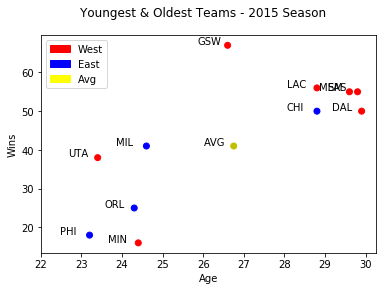

In [55]:
# call get_age_graph() function to show Age graph
get_age_graph(WINS_teams_2015, west_conf, east_conf)

Use code below to manually recoordinate location of (SAS & MEM) data point label.

In [56]:
# # create graph for 5 youngest and oldest teams; include AVG age of NBA teams
# # if GSW is not 5 youngest or oldest, show GSW

# # create ndarray variables holding teams, variable stats, and wins
# age_teams, age_x, age_y = get_age_info(WINS_teams_2015) # call show_age() function to get ndarray of teams, age, wins

# # color markers based on team conference
# age_col = get_color(age_teams, west_conf, east_conf) # call get_color() function to get list of colors for graph
        
# plt.scatter(x=age_x, y=age_y, c=age_col) # create graph

# # create labels
# # NOTE: to adjust label of SAS and MEM teams, use code below instead of function call to label
# for label,x,y in zip(age_teams, age_x, age_y):
#     if label == 'SAS':
#         plt.annotate(s=label, xy=(x, y), xytext=(-1,8), textcoords='offset points')
#     elif label == 'MEM':
#         plt.annotate(s=label, xy=(x, y), xytext=(-25,8), textcoords='offset points')
#     else:
#         plt.annotate(s=label, xy=(x, y), xytext=(-30,1), textcoords='offset points')

# plt.xlabel('Age')
# plt.ylabel('Wins')

# # add legend
# get_legend()

# # adjust graph ticks/parameters
# plt.xlim(left=22, right=31)
    
# plt.show()
# # plt.savefig('age_'+str(df['Season'].iloc[0]+'.png',bbox_inches='tight')

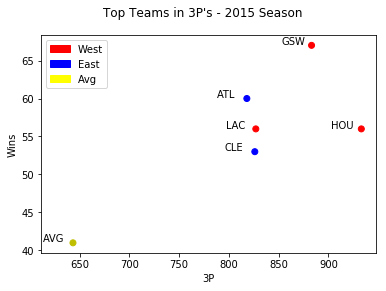

In [57]:
# call get_stat_graph() function to show 3P graph
get_stat_graph(WINS_teams_2015, '3P', west_conf, east_conf)

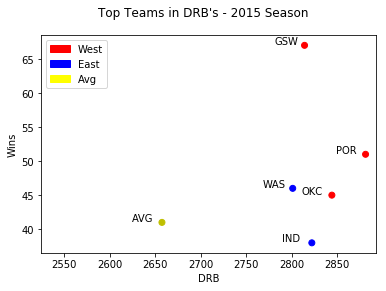

In [58]:
# call get_stat_graph() function to show DRB graph
get_stat_graph(WINS_teams_2015, 'DRB', west_conf, east_conf)

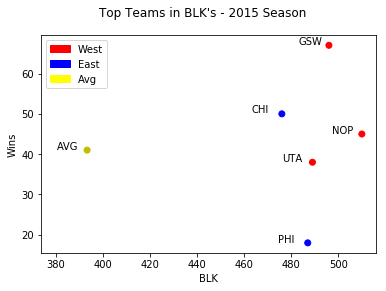

In [59]:
# call get_stat_graph() function to show BLK graph
get_stat_graph(WINS_teams_2015, 'BLK', west_conf, east_conf)

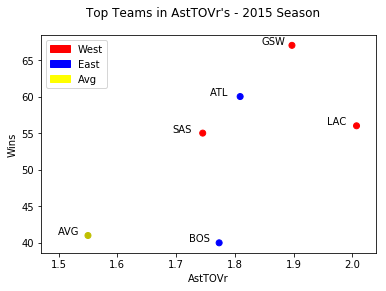

In [60]:
# call get_stat_graph() function to show AstTOVr graph
get_stat_graph(WINS_teams_2015, 'AstTOVr', west_conf, east_conf)

### <center> 2016 Season </center>

In [61]:
# call get_conf_tmw() function; returns [Tm, W] list for west & east conferences
west_2016, east_2016 = get_conf_tmw(WINS_teams_2016, west_conf, east_conf)

# call sort_conf() function; returns sorted descending [Tm, W] list for west & east conferences
west_2016_sorted, east_2016_sorted = sort_conf(west_2016, east_2016)

# call show_top_tms() function to print list of top teams from each conference for each stat in a respective season
# each top team must have a greater stat value, in the respective stat, than the average stat for the season
show_top_tms(WINS_mean, WINS_teams_2016, west_2016_sorted, east_2016_sorted)


2016 season: Age stats
Tm: ATL    Div: East    Wins: 48    Age 28.2
Tm: CLE    Div: East    Wins: 57    Age 28.1
Tm: DAL    Div: West    Wins: 42    Age 30.3
Tm: GSW    Div: West    Wins: 73    Age 27.4
Tm: HOU    Div: West    Wins: 41    Age 27.8
Tm: IND    Div: East    Wins: 45    Age 26.9
Tm: LAC    Div: West    Wins: 53    Age 29.7
Tm: MEM    Div: West    Wins: 42    Age 30.5
Tm: MIA    Div: East    Wins: 48    Age 28.4
Tm: SAS    Div: West    Wins: 67    Age 30.3

2016 season: 3P stats
Tm: ATL    Div: East    Wins: 48    3P 815
Tm: BOS    Div: East    Wins: 48    3P 717
Tm: CHO    Div: East    Wins: 48    3P 873
Tm: CLE    Div: East    Wins: 57    3P 880
Tm: DAL    Div: West    Wins: 42    3P 806
Tm: DET    Div: East    Wins: 44    3P 740
Tm: GSW    Div: West    Wins: 73    3P 1077
Tm: HOU    Div: West    Wins: 41    3P 878
Tm: IND    Div: East    Wins: 45    3P 663
Tm: LAC    Div: West    Wins: 53    3P 797
Tm: OKC    Div: West    Wins: 55    3P 678
Tm: POR    Div: West    Wins:

In [62]:
# find the index of the min value for 'Age'
print(WINS_teams_2016['Age'].idxmin())

113


In [63]:
# find the index of the max value for each predictor variable
print(WINS_teams_2016[['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].idxmax())

Age        73
3P         48
3P%        48
DRB        48
AST        48
BLK        78
AstTOVr    48
TS%        48
dtype: int64


In [64]:
# view the rows for indexes of max values and min value for 'Age'
print(WINS_teams_2016.loc[[113, 73,48,78]])

     Season   Tm   W   Age    3P    3P%   DRB   AST  BLK   AstTOVr       TS%
113    2016  PHI  10  23.3   764  0.339  2605  1765  495  1.314222  0.518634
73     2016  MEM  42  30.5   504  0.331  2497  1697  350  1.556881  0.524288
48     2016  GSW  73  27.4  1077  0.416  2972  2373  498  1.906024  0.592769
78     2016  MIA  48  28.4   498  0.336  2811  1709  531  1.479654  0.544887


**Create graphs for Age, BLK**

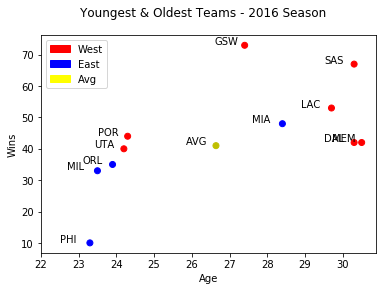

In [65]:
# call get_age_graph() function to show Age graph
get_age_graph(WINS_teams_2016, west_conf, east_conf)

Use code below to manually recoordinate location of (MEM) data point label.

In [66]:
# # create graph for 5 youngest and oldest teams; include AVG age of NBA teams
# # if GSW is not 5 youngest or oldest, show GSW

# # create ndarray variables holding teams, variable stats, and wins
# age_teams, age_x, age_y = get_age_info(WINS_teams_2016) # call show_age() function to get ndarray of teams, age, wins

# # color markers based on team conference
# age_col = get_color(age_teams, west_conf, east_conf) # call get_color() function to get list of colors for graph
        
# plt.scatter(x=age_x, y=age_y, c=age_col) # create graph

# # create labels
# # NOTE: to adjust label of MEM teams, use code below instead of function call to label
# for label,x,y in zip(age_teams, age_x, age_y):
#     if label == 'MEM':
#         plt.annotate(s=label, xy=(x, y), xytext=(-25,8), textcoords='offset points')
#     else:
#         plt.annotate(s=label, xy=(x, y), xytext=(-30,1), textcoords='offset points')

# plt.xlabel('Age')
# plt.ylabel('Wins')

# # add legend
# get_legend()

# # adjust graph ticks/parameters
# plt.xlim(left=22, right=31)
    
# plt.show()
# # plt.savefig('age_'+str(df['Season'].iloc[0]+'.png',bbox_inches='tight')

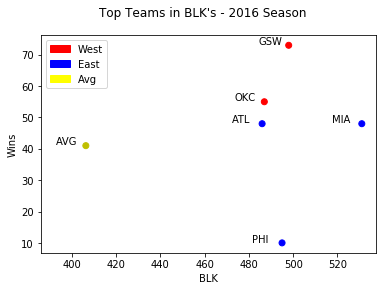

In [67]:
# call get_stat_graph() function to show BLK graph
get_stat_graph(WINS_teams_2016, 'BLK', west_conf, east_conf)

### <center> 2017 Season </center>

In [68]:
# call get_conf_tmw() function; returns [Tm, W] list for west & east conferences
west_2017, east_2017 = get_conf_tmw(WINS_teams_2017, west_conf, east_conf)

# call sort_conf() function; returns sorted descending [Tm, W] list for west & east conferences
west_2017_sorted, east_2017_sorted = sort_conf(west_2017, east_2017)

# call show_top_tms() function to print list of top teams from each conference for each stat in a respective season
# each top team must have a greater stat value, in the respective stat, than the average stat for the season
show_top_tms(WINS_mean, WINS_teams_2017, west_2017_sorted, east_2017_sorted)


2017 season: Age stats
Tm: ATL    Div: East    Wins: 43    Age 27.9
Tm: CHI    Div: East    Wins: 41    Age 26.9
Tm: CLE    Div: East    Wins: 51    Age 29.2
Tm: GSW    Div: West    Wins: 67    Age 28.2
Tm: HOU    Div: West    Wins: 55    Age 27.4
Tm: IND    Div: East    Wins: 42    Age 27.0
Tm: LAC    Div: West    Wins: 51    Age 30.0
Tm: MEM    Div: West    Wins: 43    Age 29.5
Tm: SAS    Div: West    Wins: 61    Age 29.6
Tm: UTA    Div: West    Wins: 51    Age 26.8

2017 season: 3P stats
Tm: ATL    Div: East    Wins: 43    3P 729
Tm: BOS    Div: East    Wins: 53    3P 985
Tm: CLE    Div: East    Wins: 51    3P 1067
Tm: GSW    Div: West    Wins: 67    3P 982
Tm: HOU    Div: West    Wins: 55    3P 1181
Tm: IND    Div: East    Wins: 42    3P 709
Tm: LAC    Div: West    Wins: 51    3P 841
Tm: MEM    Div: West    Wins: 43    3P 767
Tm: MIA    Div: East    Wins: 41    3P 808
Tm: MIL    Div: East    Wins: 42    3P 720
Tm: OKC    Div: West    Wins: 47    3P 692
Tm: POR    Div: West    Wins

In [69]:
# find the index of the min value for 'Age'
print(WINS_teams_2017['Age'].idxmin())

87


In [70]:
# find the index of the max value for each predictor variable
print(WINS_teams_2017[['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].idxmax())

Age         62
3P          52
3P%        132
DRB         12
AST         47
BLK         47
AstTOVr     47
TS%         47
dtype: int64


In [71]:
# view the rows for indexes of max values and min value for 'Age'
print(WINS_teams_2017.loc[[87,62,52,132,12,47]])

     Season   Tm   W   Age    3P    3P%   DRB   AST  BLK   AstTOVr       TS%
87     2017  MIN  31  24.0   601  0.349  2540  1940  370  1.686957  0.555232
62     2017  LAC  51  30.0   841  0.375  2790  1848  347  1.740113  0.574435
52     2017  HOU  55  27.4  1181  0.357  2746  2070  352  1.669355  0.583116
132    2017  SAS  61  29.6   753  0.391  2777  1954  484  1.774750  0.563873
12     2017  BRK  20  26.0   877  0.338  2879  1756  387  1.294985  0.550611
47     2017  GSW  67  28.2   982  0.383  2873  2491  555  2.056978  0.597372


**Create graphs for Age, 3P, 3P%, DRB**

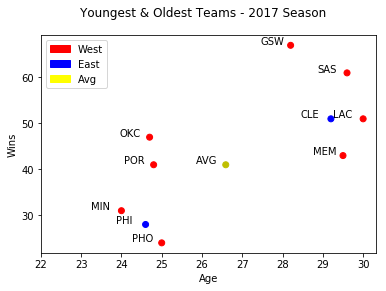

In [72]:
# call get_age_graph() function to show Age graph
get_age_graph(WINS_teams_2017, west_conf, east_conf)

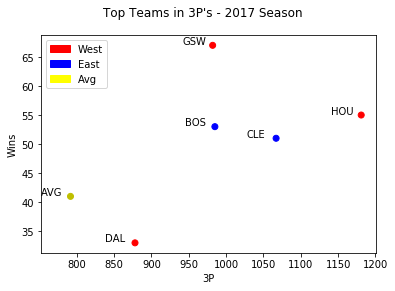

In [73]:
# call get_stat_graph() function to show 3P graph
get_stat_graph(WINS_teams_2017, '3P', west_conf, east_conf)

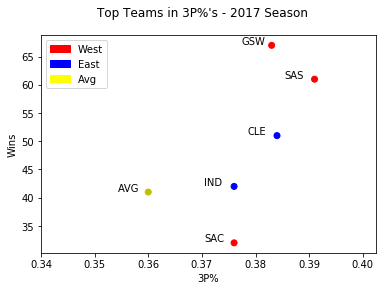

In [74]:
# call get_stat_graph() function to show 3P% graph
get_stat_graph(WINS_teams_2017, '3P%', west_conf, east_conf)

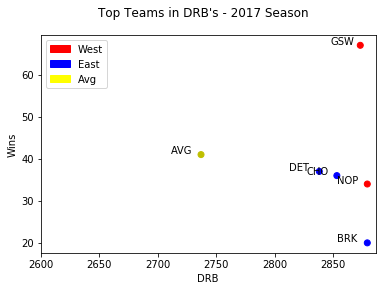

In [75]:
# call get_stat_graph() function to show DRB graph
get_stat_graph(WINS_teams_2017, 'DRB', west_conf, east_conf)

### <center> 2018 Season </center>

In [76]:
# call get_conf_tmw() function; returns [Tm, W] list for west & east conferences
west_2018, east_2018 = get_conf_tmw(WINS_teams_2018, west_conf, east_conf)

# call sort_conf() function; returns sorted descending [Tm, W] list for west & east conferences
west_2018_sorted, east_2018_sorted = sort_conf(west_2018, east_2018)

# call show_top_tms() function to print list of top teams from each conference for each stat in a respective season
# each top team must have a greater stat value, in the respective stat, than the average stat for the season
show_top_tms(WINS_mean, WINS_teams_2018, west_2018_sorted, east_2018_sorted)


2018 season: Age stats
Tm: CLE    Div: East    Wins: 50    Age 30.6
Tm: GSW    Div: West    Wins: 58    Age 28.8
Tm: HOU    Div: West    Wins: 65    Age 29.8
Tm: MIN    Div: West    Wins: 47    Age 27.1
Tm: NOP    Div: West    Wins: 48    Age 27.6
Tm: OKC    Div: West    Wins: 48    Age 27.3
Tm: SAS    Div: West    Wins: 47    Age 29.3
Tm: WAS    Div: East    Wins: 43    Age 26.9

2018 season: 3P stats
Tm: BOS    Div: East    Wins: 55    3P 939
Tm: CLE    Div: East    Wins: 50    3P 981
Tm: GSW    Div: West    Wins: 58    3P 926
Tm: HOU    Div: West    Wins: 65    3P 1256
Tm: IND    Div: East    Wins: 48    3P 741
Tm: MIA    Div: East    Wins: 44    3P 903
Tm: MIL    Div: East    Wins: 44    3P 718
Tm: MIN    Div: West    Wins: 47    3P 658
Tm: NOP    Div: West    Wins: 48    3P 837
Tm: OKC    Div: West    Wins: 48    3P 881
Tm: PHI    Div: East    Wins: 52    3P 901
Tm: POR    Div: West    Wins: 49    3P 845
Tm: SAS    Div: West    Wins: 47    3P 696
Tm: TOR    Div: East    Wins: 59 

In [77]:
# find the index of the min value for 'Age'
print(WINS_teams_2018['Age'].idxmin())

66


In [78]:
# find the index of the max value for each predictor variable
print(WINS_teams_2018[['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].idxmax())

Age         26
3P          51
3P%         46
DRB        111
AST         46
BLK         46
AstTOVr     46
TS%         46
dtype: int64


In [79]:
# view the rows for indexes of max values and min value for 'Age'
print(WINS_teams_2018.loc[[66,26,51,46,111]])

     Season   Tm   W   Age    3P    3P%   DRB   AST  BLK   AstTOVr       TS%
66     2018  LAL  35  23.7   822  0.345  2927  1949  388  1.505019  0.547822
26     2018  CLE  50  30.6   981  0.372  2761  1916  312  1.701599  0.583507
51     2018  HOU  65  29.8  1256  0.362  2825  1767  392  1.556828  0.589606
46     2018  GSW  58  28.8   926  0.391  2877  2402  612  1.895817  0.602987
111    2018  PHI  52  25.8   901  0.369  2996  2221  420  1.641537  0.568440


**Create graphs for Age, 3P, DRB**

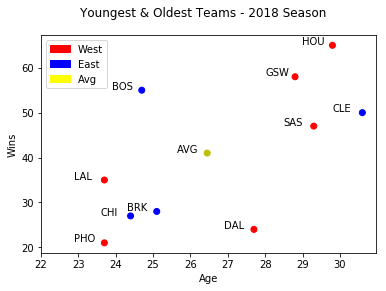

In [80]:
# call get_age_graph() function to show Age graph
get_age_graph(WINS_teams_2018, west_conf, east_conf)

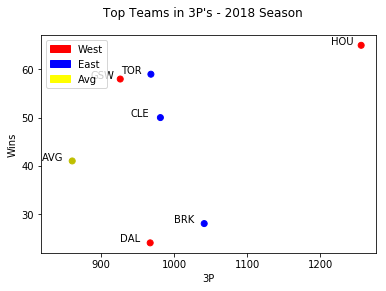

In [81]:
# call get_stat_graph() function to show 3P graph
get_stat_graph(WINS_teams_2018, '3P', west_conf, east_conf)

Use code below to manually recoordinate location of legend placement.

In [82]:
# # create graph for top 5 teams in 3P; include AVG 3P of NBA teams and GSW standing

# # create ndarray variables holding teams, variable stats, and wins
# teams, stat_x, stat_y = get_stat_info(WINS_teams_2018, '3P') # call get_stat_info() function to get ndarrays of teams, stat, wins

# # color markers based on team conference
# colors = get_color(teams, west_conf, east_conf) # call get_color() function to get list of colors

# plt.scatter(x=stat_x, y=stat_y, c=colors) # create graph

# # create labels
# get_labels(teams, '3P', stat_x, stat_y) # call get_labels() function to annotate labels

# # create legend
# red18_3p = mpatches.Patch(color='red', label='West')
# blue18_3p = mpatches.Patch(color='blue', label='East')
# yellow18_3p = mpatches.Patch(color='yellow', label='Avg')

# plt.legend(loc='lower right', handles=[red18_3p, blue18_3p, yellow18_3p])

# # adjust graph ticks/parameters
# plt.xlim(left=810)

# # create title
# plt.suptitle("Top Teams in 3P's - " + str(WINS_teams_2018['Season'].iloc[0]) + ' Season')
    
# plt.show()
# # plt.savefig('3p_2018.png',bbox_inches='tight')

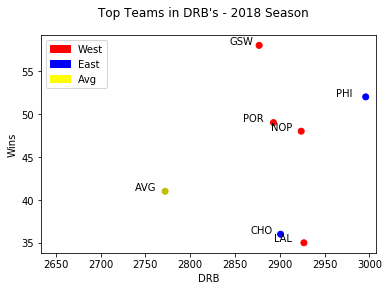

In [83]:
# call get_stat_graph() function to show DRB graph
get_stat_graph(WINS_teams_2018, 'DRB', west_conf, east_conf)

### <center> 2019 Season </center>

In [84]:
# call get_conf_tmw() function; returns [Tm, W] list for west & east conferences
west_2019, east_2019 = get_conf_tmw(WINS_teams_2019, west_conf, east_conf)

# call sort_conf() function; returns sorted descending [Tm, W] list for west & east conferences
west_2019_sorted, east_2019_sorted = sort_conf(west_2019, east_2019)

# call show_top_tms() function to print list of top teams from each conference for each stat in a respective season
# each top team must have a greater stat value, in the respective stat, than the average stat for the season
show_top_tms(WINS_mean, WINS_teams_2019, west_2019_sorted, east_2019_sorted)


2019 season: Age stats
Tm: DET    Div: East    Wins: 41    Age 26.9
Tm: GSW    Div: West    Wins: 57    Age 28.4
Tm: HOU    Div: West    Wins: 53    Age 29.2
Tm: IND    Div: East    Wins: 48    Age 27.0
Tm: LAC    Div: West    Wins: 48    Age 27.2
Tm: MIL    Div: East    Wins: 60    Age 26.9
Tm: SAS    Div: West    Wins: 48    Age 28.8
Tm: TOR    Div: East    Wins: 58    Age 27.3
Tm: UTA    Div: West    Wins: 50    Age 27.3

2019 season: 3P stats
Tm: BOS    Div: East    Wins: 49    3P 1032
Tm: BRK    Div: East    Wins: 42    3P 1047
Tm: DEN    Div: West    Wins: 54    3P 903
Tm: DET    Div: East    Wins: 41    3P 993
Tm: GSW    Div: West    Wins: 57    3P 1087
Tm: HOU    Div: West    Wins: 53    3P 1323
Tm: IND    Div: East    Wins: 48    3P 779
Tm: LAC    Div: West    Wins: 48    3P 821
Tm: MIL    Div: East    Wins: 60    3P 1105
Tm: OKC    Div: West    Wins: 49    3P 932
Tm: ORL    Div: East    Wins: 42    3P 937
Tm: PHI    Div: East    Wins: 51    3P 889
Tm: POR    Div: West    Win

In [85]:
# find the index of the min value for 'Age'
print(WINS_teams_2019['Age'].idxmin())

95


In [86]:
# find the index of the max value for each predictor variable
print(WINS_teams_2019[['Age', '3P', '3P%', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TS%']].idxmax())

Age         50
3P          50
3P%        130
DRB         80
AST         45
BLK         45
AstTOVr     45
TS%         45
dtype: int64


In [87]:
# view the rows for indexes of max values and min value for 'Age'
print(WINS_teams_2019.loc[[95,50,130,80,45]])

     Season   Tm   W   Age    3P    3P%   DRB   AST  BLK   AstTOVr       TS%
95     2019  NYK  17  23.4   823  0.340  2811  1646  422  1.430061  0.529214
50     2019  HOU  53  29.2  1323  0.356  2613  1741  405  1.591408  0.580660
130    2019  SAS  48  28.8   812  0.392  2910  2013  386  2.029234  0.571907
80     2019  MIL  60  26.9  1105  0.353  3316  2136  486  1.878628  0.582879
45     2019  GSW  57  28.4  1087  0.385  2990  2413  525  2.064157  0.595923


**Create graphs for Age, 3P, 3P%, DRB**

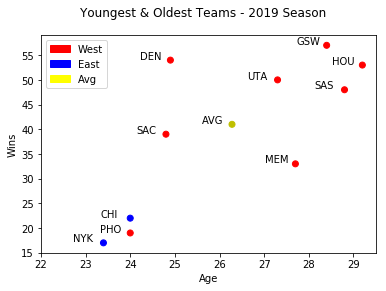

In [88]:
# call get_age_graph() function to show Age graph
get_age_graph(WINS_teams_2019, west_conf, east_conf)

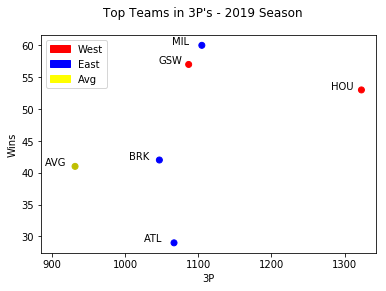

In [89]:
# call get_stat_graph() function to show 3P graph
get_stat_graph(WINS_teams_2019, '3P', west_conf, east_conf)

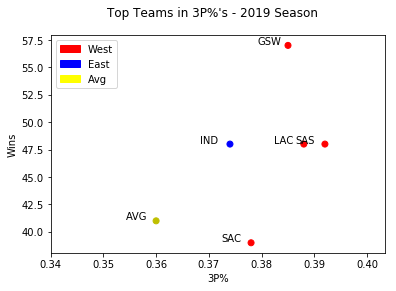

In [90]:
# call get_stat_graph() function to show 3P% graph
get_stat_graph(WINS_teams_2019, '3P%', west_conf, east_conf)

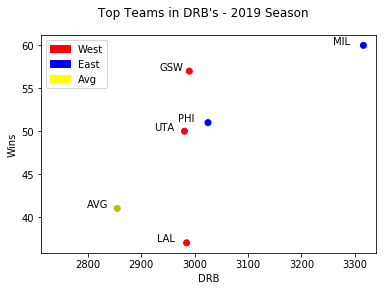

In [91]:
# call get_stat_graph() function to show DRB graph
get_stat_graph(WINS_teams_2019, 'DRB', west_conf, east_conf)